In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

In [ ]:
!kaggle datasets download -d dansbecker/5-celebrity-faces-dataset

 99% 5.00M/5.03M [00:00<00:00, 14.5MB/s]
100% 5.03M/5.03M [00:00<00:00, 14.5MB/s]


In [ ]:
!ls

5-celebrity-faces-dataset.zip  drive  kaggle.json  sample_data


In [ ]:
!ls

5-celebrity-faces-dataset.zip  drive	    sample_data  val
data			       kaggle.json  train


In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

import warnings
warnings.filterwarnings("ignore" , category=FutureWarning)

In [ ]:
image = cv2.imread('data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')

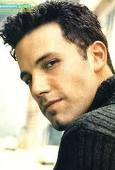

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
detector = MTCNN()
faces = detector.detect_faces(image)
for face in faces:
  print(face)

{'box': [20, 35, 70, 88], 'confidence': 0.9996923208236694, 'keypoints': {'left_eye': (29, 73), 'right_eye': (54, 63), 'nose': (37, 90), 'mouth_left': (42, 108), 'mouth_right': (63, 100)}}


In [ ]:
def create_bbox(image):
  faces=detector.detect_faces(image)
  bounding_box=faces[0]['box']

  cv2.rectangle(image,
                (bounding_box[0],bounding_box[1]),
                (bounding_box[0]+bounding_box[2],
                 bounding_box[1] + bounding_box[3]),
                (0,155,255),
                2)
  return image

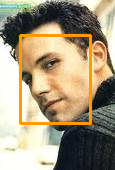

In [ ]:
cv2_imshow(create_bbox(image))

In [ ]:
marked_image = create_bbox(cv2.imread('/content/data/train/madonna/httpssmediacacheakpinimgcomxaaeaaeecccaedfebdbjpg.jpg'))

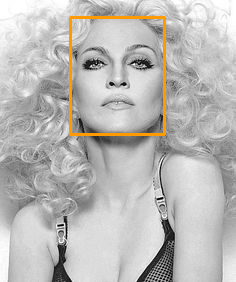

In [ ]:
cv2_imshow(marked_image)

In [ ]:
def extract_face(image , resize=(224 , 224)):
  image = cv2.imread(image)

  faces = detector.detect_faces(image)
  x1 , y1 , width , height = faces[0]['box']
  x2 , y2 = x1+width , y1+height
  face_boundary = image[y1:y2 , x1:x2]
  face_image = cv2.resize(face_boundary , resize)
  return face_image

In [ ]:
face_image = extract_face('/content/data/train/madonna/httpssmediacacheakpinimgcomxaaeaaeecccaedfebdbjpg.jpg')

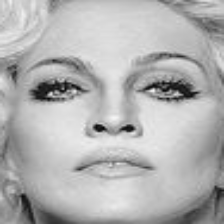

In [ ]:
cv2_imshow(face_image)

In [ ]:
# extract features/ embedding  
def get_embeddings(faces):
  face = np.asarray(faces , 'float32')
  face = preprocess_input(face , version=2)
  model = VGGFace(model='resnet50' , include_top=False , input_shape=(224,224,3),pooling='avg')
  return model.predict(face)

In [ ]:
def get_similarity(faces):
  embeddings = get_embeddings(faces)
  score = cosine(embeddings[0] , embeddings[1])
  if score <= 0.5:
    return "Face Matched", score
  else:
    return "Face not matched", score

In [ ]:
faces = [extract_face(image) for image in ['/content/data/train/madonna/httpssmediacacheakpinimgcomxaaeaaeecccaedfebdbjpg.jpg' , '/content/data/val/madonna/httpassetsrollingstonecomassetsarticlemadonnadavidbowiechangedthecourseofmylifeforeversmallsquarexmadonnabowiejpg.jpg']]


In [ ]:
fac2=[]
for image in ['/content/data/train/mindy_kaling/httpssmediacacheakpinimgcomxededbebccdajpg.jpg' , '/content/data/val/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnemmysperformancewatchnowjpg.jpg']:
   fac2.append(extract_face(image))
# print(fac2)
get_similarity(fac2)

('Face not matched', 0.5449228584766388)

In [ ]:
get_similarity(faces)

('Face Matched', 0.4498952627182007)

In [ ]:
fac2=[]
for image in ['/content/data/train/madonna/httpssmediacacheakpinimgcomxaaeaaeecccaedfebdbjpg.jpg' , '/content/data/val/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnemmysperformancewatchnowjpg.jpg']:
   fac2.append(extract_face(image))
# print(fac2)
get_similarity(fac2)


('Face not matched', 0.7713884562253952)